In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from tensorflow.python.keras import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.python import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk

# 파일읽기

In [2]:
df=pd.read_excel('../optimal_data3_1/'+'Continous_2weeks_2day_1term.xlsx')

In [3]:
df

,0,1,2,3,4,5,6,7,8
0,#AAGQKY,45.15,20.612673,72.0,0.0,0.0,0.0,148.0,0
1,#AAGQKY,45.15,20.612673,72.0,0.0,0.0,0.0,148.0,0
2,#AAGQKY,45.15,20.612673,72.0,0.0,0.0,0.0,148.0,0
3,#AAGQKY,45.15,20.612673,72.0,0.0,0.0,0.0,148.0,0
4,#AAGQKY,45.15,20.612673,72.0,0.0,0.0,0.0,148.0,0
...,...,...,...,...,...,...,...,...,...
58820,#ZZLSSL,68.00,29.048656,0.0,0.0,0.0,0.0,153.0,0
58821,#ZZLSSL,68.00,29.048656,0.0,0.0,0.0,0.0,153.0,0
58822,#ZZLSSL,68.00,29.048656,0.0,0.0,0.0,0.0,153.0,0
58823,#ZZLSSL,68.00,29.048656,0.0,0.0,0.0,0.0,153.0,0


# 데이터를 필요한 부분으로 X, Y 나눠 읽어오기

In [4]:
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X)

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]
pred_list=[]

In [5]:
#한 사람당 데이터 수
Count_1=int(181*0.1)
#한 사람당 데이터 수
Count_2=181

X_test=pd.DataFrame()
X_train=pd.DataFrame()
y_test=pd.DataFrame()
y_train=pd.DataFrame()
empty=pd.DataFrame()

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]

# 모델

## Deep Neural Network

## Input Feature : 6

## Hidden Layer : 128 - 256 - 128

## optimizer : adam, loss : categorical_crossentropy

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

SMOTE 적용 전 Train 레이블 값 분포: 
 0.0    49915
1.0     1621
2.0      950
dtype: int64
SMOTE 적용 전 Test 레이블 값 분포: 
 0.0    5199
1.0     368
2.0     229
dtype: int64
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (15597, 6) (15597, 1)
SMOTE 적용 후 Train 레이블 값 분포: 
 0.0    49915
1.0    49915
2.0    49915
dtype: int64
SMOTE 적용 후 Test 레이블 값 분포: 
 0.0    5199
1.0    5199
2.0    5199
dtype: int64
867/867 [==============================] - 2s 2ms/step - loss: 2.0769 - accuracy: 0.4441
[0]Accuracy : 0.44412386417388916
[0]F1score : 0.42577671500023784
[0]Precision : 0.43639842514189414
[0]Recall : 0.44405975508110535



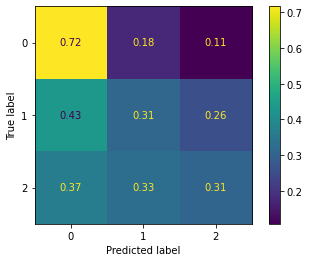

In [10]:
for i in range(10):
    X_test=empty
    X_train=empty
    y_test=empty
    y_train=empty
    y_test_list=[]
    for j in range(322):
        X_temp_test=X.iloc[Count_2*j+Count_1*i:Count_2*j+Count_1*(i+1)]
        X_test=pd.concat([X_test,X_temp_test])
        X_temp_train=X.iloc[Count_2*j+Count_1:Count_2*(j+1)]
        X_train=pd.concat([X_train,X_temp_train])
        
        y_temp_test=y.iloc[Count_2*j+Count_1*i:Count_2*j+Count_1*(i+1)]
        y_test=pd.concat([y_test,y_temp_test])
        y_temp_train=y.iloc[Count_2*j+Count_1:Count_2*(j+1)]
        y_train=pd.concat([y_train,y_temp_train])
        
    
    print('SMOTE 적용 전 Train 레이블 값 분포: \n', y_train.value_counts())
    print('SMOTE 적용 전 Test 레이블 값 분포: \n', y_test.value_counts())
    
    # SMOTE 적용
    smote = SMOTE(random_state=0)
    X_train, y_train = smote.fit_resample(X_train,y_train)
    X_test,y_test = smote.fit_resample(X_test,y_test)
    print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_test.shape, y_test.shape)
    print('SMOTE 적용 후 Train 레이블 값 분포: \n', y_train.value_counts())
    print('SMOTE 적용 후 Test 레이블 값 분포: \n', y_test.value_counts())
    
    # 원핫인코딩
    # 예시 : 1 , 2 -> (1,0) , (0,1)
    y_train=pd.get_dummies(y_train[0])
    y_test=pd.get_dummies(y_test[0])
    
    history=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=18)
    predicted=model.predict(X_test)
    results = model.evaluate(X_test, y_test, batch_size=18)
    print("[{}]Accuracy : {}".format(i,results[1]))   
    
    predicted=pd.DataFrame(predicted)
    predicted=predicted.idxmax(axis=1)
    y_test=y_test.idxmax(axis=1)
    
#     print("predicted",predicted)
#     print("y_test",y_test)
    
    #f1score
    f1 = f1_score(y_test,predicted, average='weighted')
    print("[{}]F1score : {}".format(i,f1))
    #precision/recall
    p_rlist=sk(y_test,predicted,average='weighted')
    print("[{}]Precision : {}".format(i,p_rlist[0]))
    print("[{}]Recall : {}".format(i,p_rlist[1]))
    print()
     #결과 배열에 넣기
    Result[i][0]=results[1]
    Result[i][1]=f1
    Result[i][2]=p_rlist[0]
    Result[i][3]=p_rlist[1]
    del results
    del f1
    del p_rlist
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    confusion_matrix(y_test, predicted)

    cm = confusion_matrix(y_test, predicted, labels=[0,1,2],normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    filename=("ConfusionMatrix_"+str(i))
    plt.savefig(filename+".png")
    plt.show()

In [ ]:
Result_df=pd.DataFrame(Result,columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

In [ ]:
print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

In [ ]:
Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy']=Result_df['Accuracy']
A=[Result_df['Accuracy'].mean(),Result_df['F1-Score'].mean(),Result_df['Precision'].mean(),Result_df['Recall'].mean()]
A=pd.DataFrame(A,columns=['Accuracy'])
Matrix=pd.concat([Matrix,A])
Matrix=Matrix.transpose()
Matrix.to_excel('./PFMatrix2.xlsx')